<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=151110832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 46.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.7 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=49fdc25bba596039c26bc51c263c83cedc5251b3d88fea3945830c5c39afc100
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

In [3]:
# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.158897,1.818910,0.119248,1.897154,14.116466,12.509309,14.600188,17.559046,2.298459,0.637021,...,0.139147,4.185137,3.876553,3.966079,3.762886,0.430118,6.332526,0.455737,0.937317,0.000663
2014-11-25,12.044097,1.819065,0.119667,1.901548,14.118608,12.536093,14.638052,17.610530,2.300898,0.638967,...,0.138826,4.219926,3.877141,3.979315,3.763557,0.430445,6.363173,0.456440,0.940801,0.000661
2014-11-26,12.045533,1.818081,0.119902,1.907540,14.106841,12.535379,14.673117,17.642336,2.298062,0.640050,...,0.138710,4.223226,3.874974,4.000012,3.759518,0.430875,6.384342,0.456606,0.942152,0.000660
2014-11-27,12.057700,1.823964,0.119982,1.903106,14.144077,12.472617,14.664846,17.627018,2.303442,0.638726,...,0.139076,4.219090,3.885202,3.987392,3.769442,0.431617,6.411639,0.457811,0.944639,0.000662
2014-11-28,12.073143,1.829138,0.119521,1.908368,14.198551,12.429505,14.708255,17.678760,2.311242,0.640548,...,0.139818,4.241539,3.899951,3.997340,3.783455,0.432487,6.396320,0.458313,0.948530,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13,13.818540,2.774087,0.142628,1.990432,21.696700,15.669668,24.018280,23.140822,2.973259,0.943839,...,0.075540,5.244258,5.960632,4.669773,5.787639,0.603860,0.759056,0.669507,0.593292,0.000898
2023-11-14,13.916888,2.755293,0.142324,2.007855,21.571096,15.630723,24.083317,23.285980,2.956512,0.956653,...,0.075103,5.214125,5.927754,4.724494,5.754134,0.597372,0.753549,0.665631,0.589858,0.000893
2023-11-15,13.922268,2.755397,0.141731,2.015009,21.557863,15.658698,24.100867,23.225108,2.957406,0.953808,...,0.075057,5.210926,5.922490,4.720252,5.750604,0.597005,0.753840,0.665222,0.589496,0.000893


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== CZK ========================================
2023-11-17 10:00:13,514 - Unknown integration target: 
2023-11-17 10:00:21,316 - Unknown integration target: 
2023-11-17 10:00:29,478 - Unknown integration target: 
2023-11-17 10:00:37,125 - Unknown integration target: 
2023-11-17 10:00:44,841 - Unknown integration target: 
2023-11-17 10:01:01,919 - Unknown integration target: 
2023-11-17 10:01:18,849 - Unknown integration target: 
2023-11-17 10:01:36,061 - Unknown integration target: 
2023-11-17 10:01:38,255 - Unknown integration target: 
2023-11-17 10:01:38,259 - Unknown integration target: 
2023-11-17 10:01:46,133 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.7 MiB, max: 263.1 MiB
2023-11-17 10:01:46,136 - ApiComposer - Initial pipeline was fitted in 5.5 sec.
2023-11-17 10:01:46,140 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-17 10:12:02,261 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [10:16<?, ?gen/s]

2023-11-17 10:12:02,294 - ApiComposer - Hyperparameters tuning started with 8 min. timeout


2023-11-17 10:12:24,882 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/CZK, lgbmreg, lagged, linear, decompose]}
linear - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CZK - {}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.004
  0%|          | 16/100000 [03:37<1005:28:59, 36.20s/trial, best loss: 0.003341581218379928]
2023-11-17 10:20:21,188 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/CZK, lgbmreg, lagged, linear, decompose]}
linear - {}
ridge - {'alpha': 4.121290559462706}
ridge - {'alpha': 7.3442658418668}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
data_source_ts/CZK - {}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsa

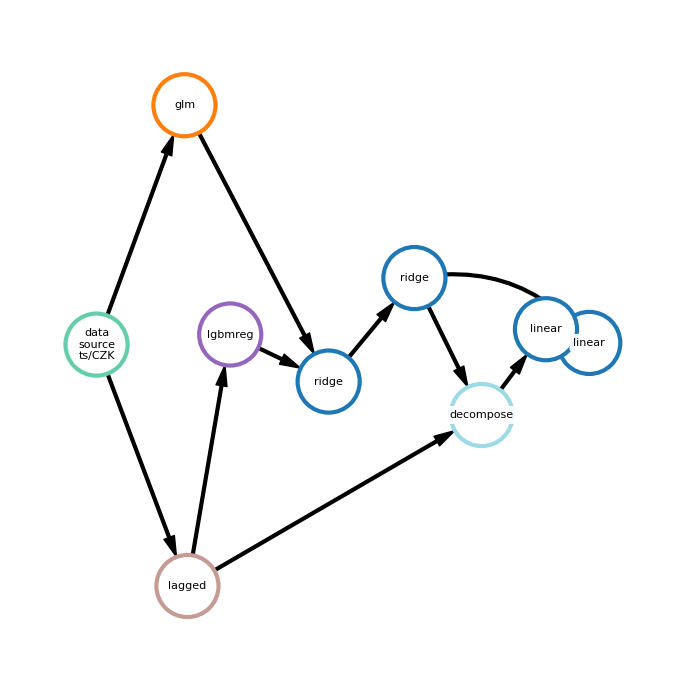

[0.81960561 0.81881814 0.81851894 0.81852174 0.81849468 0.81741241
 0.81663258 0.81668724]
{'mae': 0.004, 'mape': 0.005}


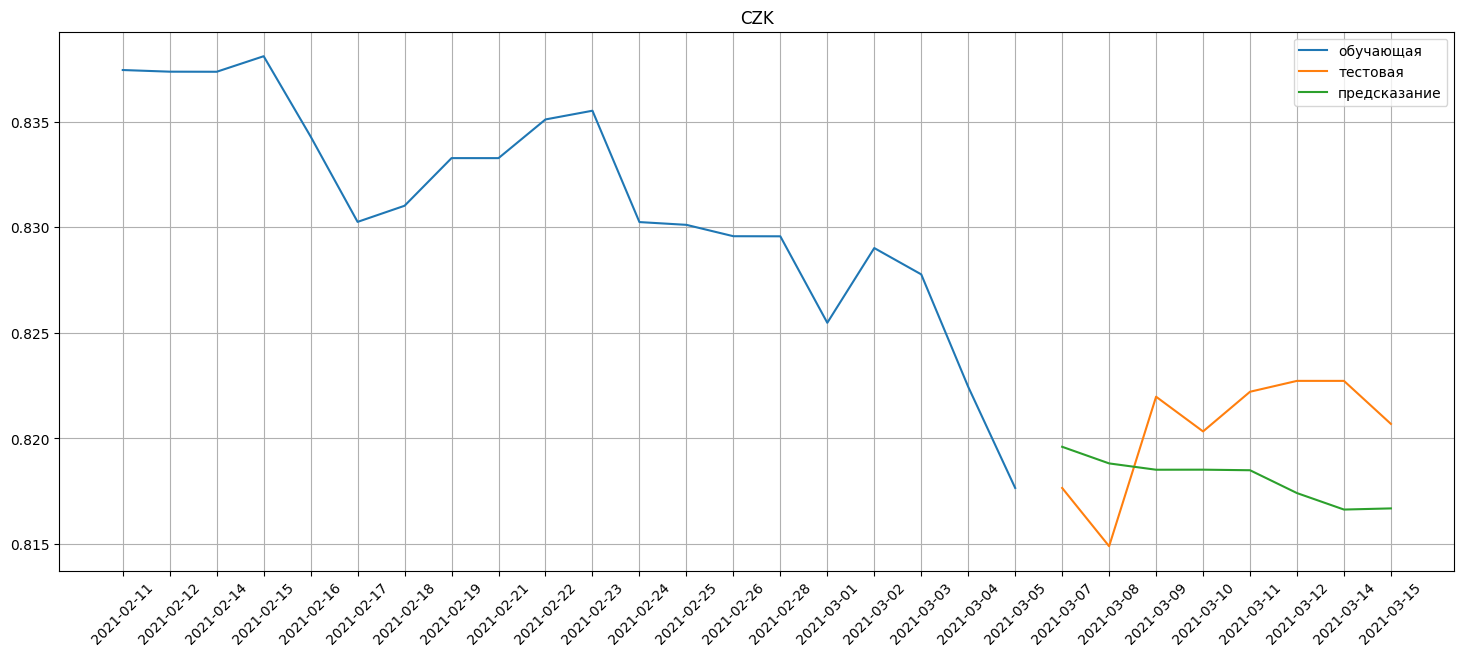


======================================== NOK ========================================
2023-11-17 10:21:01,985 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.9 MiB
2023-11-17 10:21:01,998 - ApiComposer - Initial pipeline was fitted in 9.6 sec.
2023-11-17 10:21:02,001 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-17 10:21:02,025 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 54 min. Set of candidate models: ['glm', 'clstm', 'ets', 'lagged', 'sparse_lagged', 'stl_arima', 'locf', 'gaussian_filter', 'ts_naive_average', 'diff_filter', 'arima', 'ar', 'smoothing', 'polyfit', 'cut', 'lasso', 'exog_ts', 'pca', 'rfr', 'ts_naive_average', 'diff_filter', 'normalization', 'polyfit', 'fast_ica', 'gbr', 'stl_arima', 'sparse_lagged', 'ransac_non_lin_reg', 'ransac_lin_reg', 'adareg', 'treg', 'ets', 'lagged', 'ridge', 'sgdr', 'locf', 'gaussian

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-17 14:31:46,263 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [4:10:44<?, ?gen/s]

2023-11-17 14:31:46,296 - ApiComposer - Time for pipeline composing was 4:10:44.256420.
The remaining 196.9 seconds are not enough to tune the hyperparameters.
2023-11-17 14:31:46,299 - ApiComposer - Composed pipeline returned without tuning.


2023-11-17 14:31:46,667 - ApiComposer - Model generation finished
2023-11-17 14:33:34,451 - FEDOT logger - Final pipeline was fitted
2023-11-17 14:33:34,458 - FEDOT logger - Final pipeline: {'depth': 11, 'length': 12, 'nodes': [ridge, gbr, ridge, ridge, glm, data_source_ts/NOK, ridge, lagged, linear, decompose, linear, decompose]}
ridge - {}
gbr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/NOK - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
linear - {}
decompose - {}
Memory consumption for finish in main session: current 1.9 MiB, max: 112.0 MiB


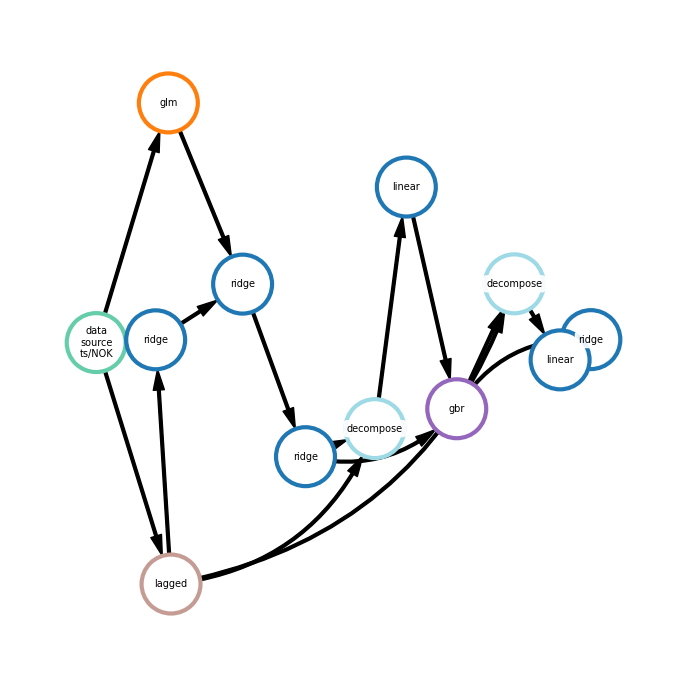

[2.12230361 2.12186797 2.12127537 2.12045576 2.11928803 2.11788572
 2.11655426 2.11518552 2.11387902 2.11278107 2.11186616 2.11089853
 2.10994382 2.10912793 2.10838709 2.10776331]
{'mae': 0.027, 'mape': 0.012}


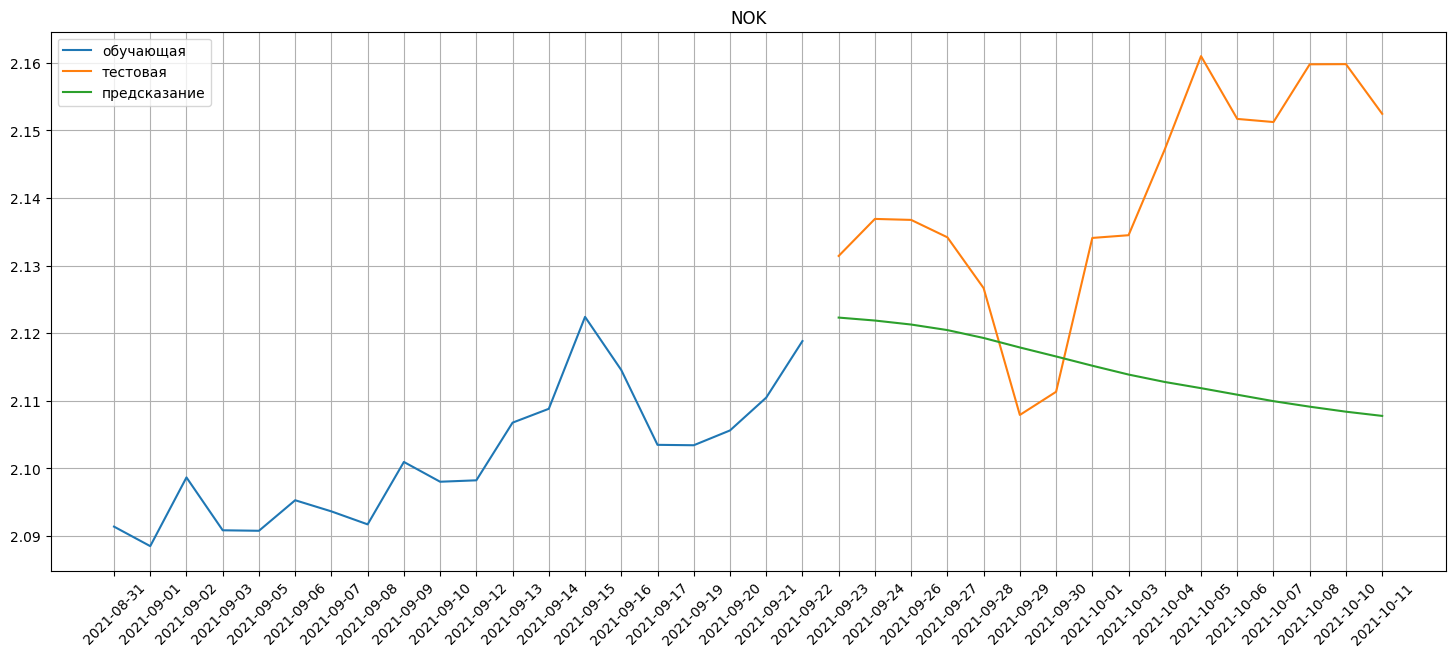


======================================== PKR ========================================
2023-11-17 14:33:56,748 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 5.2 MiB
2023-11-17 14:33:56,752 - ApiComposer - Initial pipeline was fitted in 14.5 sec.
2023-11-17 14:33:56,754 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-17 14:33:56,776 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 4 min. Set of candidate models: ['glm', 'lagged', 'ets', 'sparse_lagged', 'locf', 'gaussian_filter', 'ts_naive_average', 'diff_filter', 'ar', 'smoothing', 'polyfit', 'cut', 'adareg', 'lasso', 'ets', 'lagged', 'pca', 'rfr', 'ridge', 'sgdr', 'locf', 'gaussian_filter', 'ts_naive_average', 'diff_filter', 'ar', 'normalization', 'dtreg', 'polyfit', 'glm', 'linear', 'sparse_lagged', 'ransac_non_lin_reg', 'scaling', 'ransac_lin_reg', 'smoothing', 'cut'].
2023-11-17

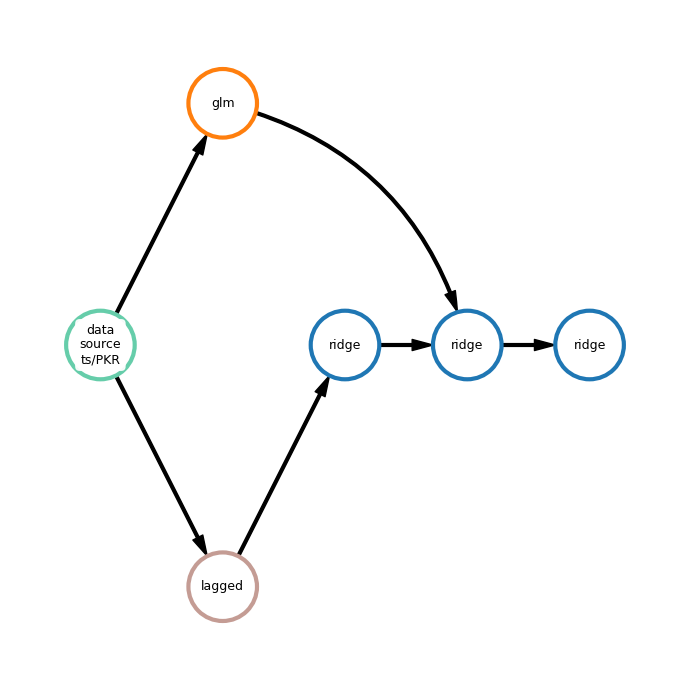

[0.07791983 0.07785562 0.07779207 0.07772857 0.07766526 0.07760173
 0.07753649 0.07747096 0.07740436 0.07733721 0.07726998 0.07720206
 0.07713302 0.07706275 0.07699189 0.07691997 0.07684818 0.07677613
 0.07670312 0.07662865]
{'mae': 0.005, 'mape': 0.062}


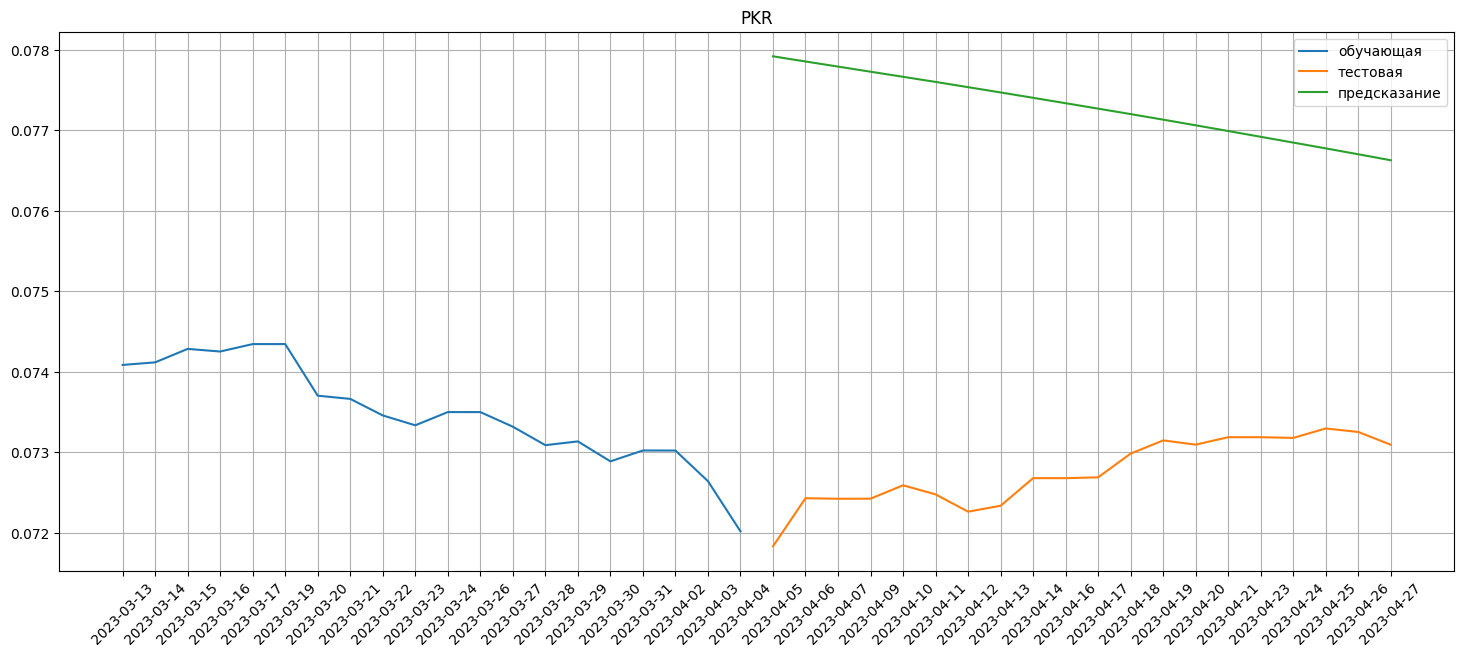


======================================== QAR ========================================
2023-11-17 14:38:30,314 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.0 MiB
2023-11-17 14:38:30,318 - ApiComposer - Initial pipeline was fitted in 13.7 sec.
2023-11-17 14:38:30,322 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-17 14:38:30,345 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 55 min. Set of candidate models: ['glm', 'clstm', 'ets', 'lagged', 'sparse_lagged', 'stl_arima', 'locf', 'gaussian_filter', 'ts_naive_average', 'diff_filter', 'arima', 'ar', 'smoothing', 'polyfit', 'cut', 'lasso', 'exog_ts', 'pca', 'rfr', 'ts_naive_average', 'diff_filter', 'normalization', 'polyfit', 'fast_ica', 'gbr', 'stl_arima', 'sparse_lagged', 'ransac_non_lin_reg', 'ransac_lin_reg', 'adareg', 'treg', 'ets', 'lagged', 'ridge', 'sgdr', 'locf', 'gaussia

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-17 14:58:55,779 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [20:25<?, ?gen/s]

2023-11-17 14:58:55,802 - ApiComposer - Hyperparameters tuning started with 34 min. timeout


2023-11-17 14:59:33,080 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/QAR, ridge, lagged, linear, decompose]}
linear - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/QAR - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.058
  0%|          | 51/100000 [27:29<1116:51:02, 40.23s/trial, best loss: 0.05474982383149285]
2023-11-17 15:34:19,632 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/QAR, ridge, lagged, linear, decompose]}
linear - {}
ridge - {'alpha': 0.5541903044966769}
ridge - {'alpha': 8.242617540671342}
glm - {'family': 'gaussian', 'link': 'log'}
data_source_ts/QAR - {}
ridge - {'alpha': 7.5195084970640576}
lagged - {'window_size': 7}
linear - {}
decompose - {}
2023-11-17 15:34:19,635 - PipelineTuner - Final metric: 0.055
2023-11-17 15:34:19,641 - ApiComposer - Hyperpa

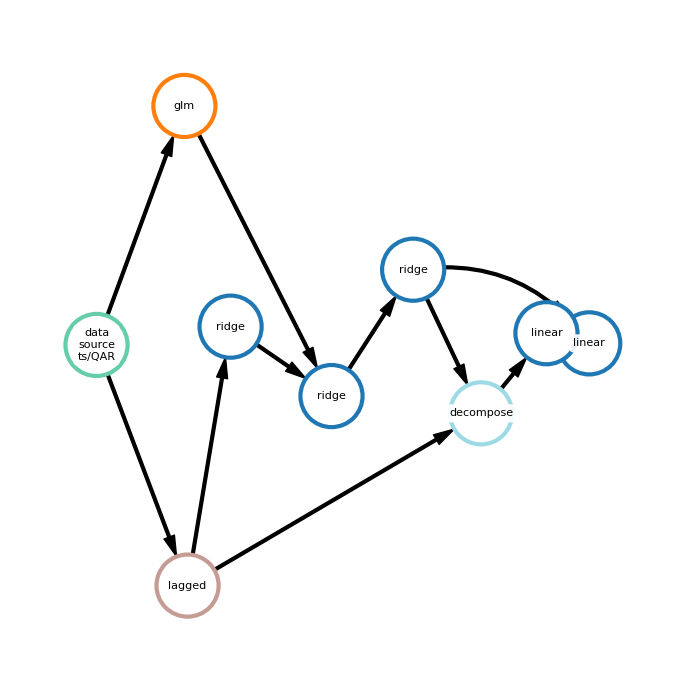

[5.69327804 5.68960408 5.6903328  5.6920303  5.68980312 5.68171245
 5.68631768 5.68701947]
{'mae': 0.027, 'mape': 0.005}


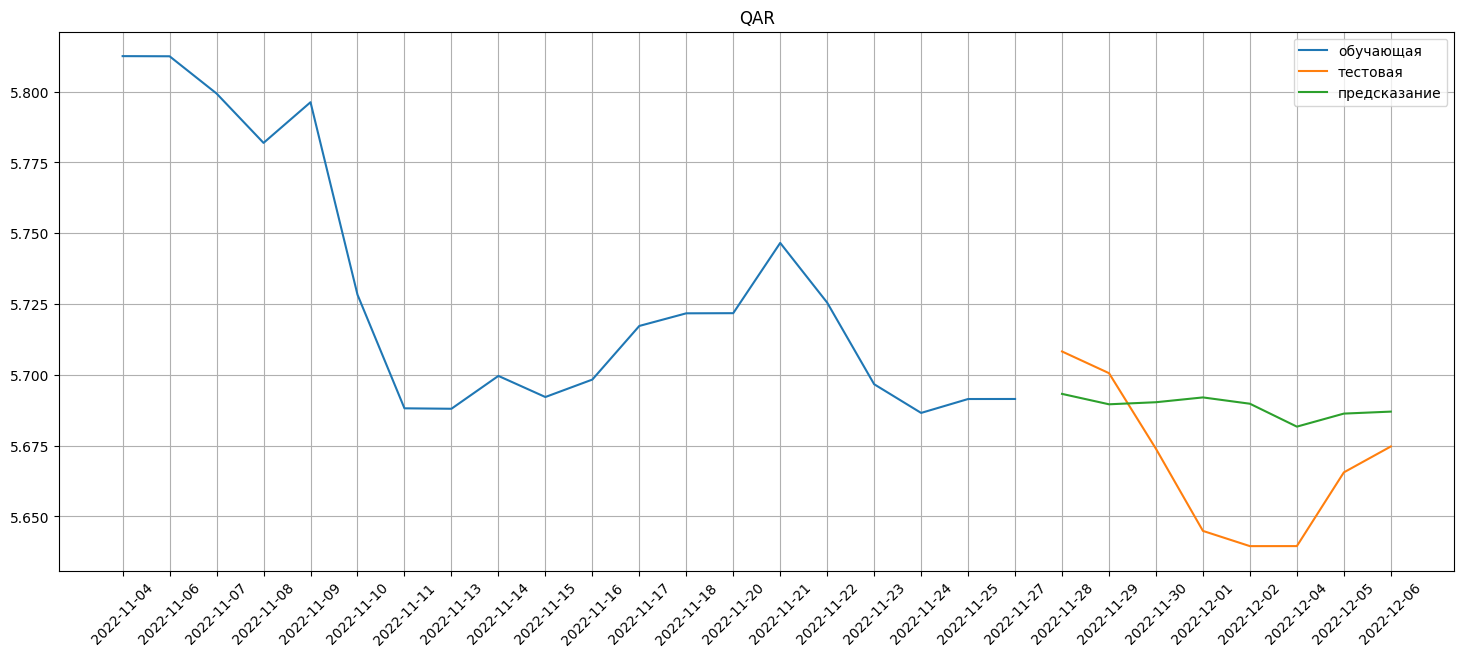


======================================== ILS ========================================
2023-11-17 15:35:17,819 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.6 MiB
2023-11-17 15:35:17,822 - ApiComposer - Initial pipeline was fitted in 15.1 sec.
2023-11-17 15:35:17,826 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-17 15:35:17,848 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 41 min. Set of candidate models: ['glm', 'clstm', 'ets', 'lagged', 'sparse_lagged', 'stl_arima', 'locf', 'gaussian_filter', 'ts_naive_average', 'diff_filter', 'arima', 'ar', 'smoothing', 'polyfit', 'cut', 'lasso', 'exog_ts', 'pca', 'rfr', 'ts_naive_average', 'diff_filter', 'normalization', 'polyfit', 'fast_ica', 'gbr', 'stl_arima', 'sparse_lagged', 'ransac_non_lin_reg', 'ransac_lin_reg', 'adareg', 'treg', 'ets', 'lagged', 'ridge', 'sgdr', 'locf', 'gaussia

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-17 15:56:02,584 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [20:44<?, ?gen/s]

2023-11-17 15:56:02,609 - ApiComposer - Hyperparameters tuning started with 20 min. timeout


2023-11-17 15:56:44,533 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/ILS, ridge, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ILS - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.038
  0%|          | 25/100000 [12:56<1437:24:11, 51.76s/trial, best loss: 0.035684864034823696]
2023-11-17 16:17:40,936 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/ILS, ridge, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100, 'reg_alpha': 0.00020863855879857531, 'reg_lambda': 1.0864355341526901}
ridge - {'alpha': 9

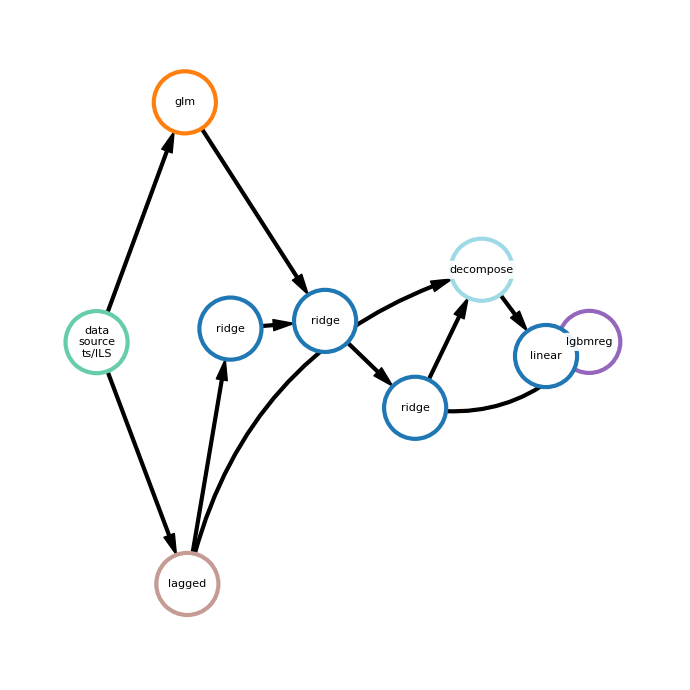

[5.60142871 5.60741313 5.61562165 5.61345292 5.60318767]
{'mae': 0.048, 'mape': 0.008}


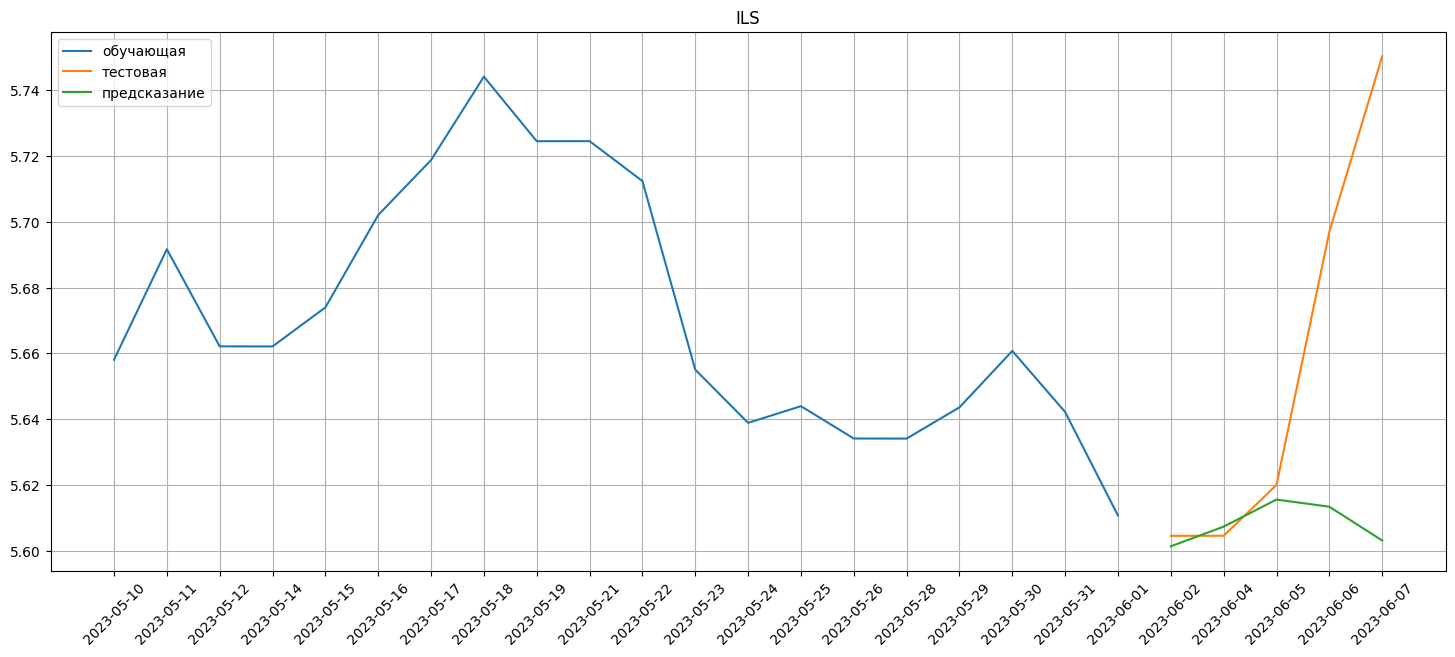

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
167,"(2023, 11, 17, 9, 59, 0, 4, 321, 0)",CZK,8,838,18,0.005
168,"(2023, 11, 17, 10, 20, 48, 4, 321, 0)",NOK,16,658,54,0.012
169,"(2023, 11, 17, 14, 33, 37, 4, 321, 0)",PKR,20,175,4,0.062
170,"(2023, 11, 17, 14, 38, 16, 4, 321, 0)",QAR,8,297,55,0.005


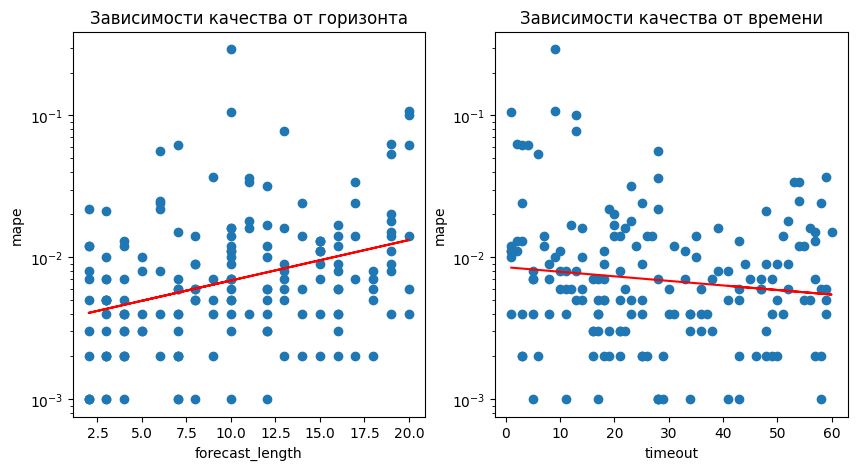

In [9]:
def get_trend(x,y):
    slope, intercept = np.polyfit(x, np.log(y), 1)
    line = np.exp(slope * x + intercept)
    return line

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(rep['forecast_length'],rep['mape'])
ax[0].semilogy()
ax[0].set_xlabel('forecast_length')
ax[0].set_ylabel('mape')
ax[0].set_title('Зависимости качества от горизонта')

line = get_trend(rep['forecast_length'],rep['mape'])
ax[0].plot(rep['forecast_length'],get_trend(rep['forecast_length'],rep['mape']),color='red')


ax[1].scatter(rep['timeout'],rep['mape'])
ax[1].semilogy()
ax[1].set_xlabel('timeout')
ax[1].set_ylabel('mape')
ax[1].set_title('Зависимости качества от времени')

line = get_trend(rep['timeout'],rep['mape'])
ax[1].plot(rep['timeout'],get_trend(rep['timeout'],rep['mape']),color='red')

plt.show()